In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_labels_val.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/yqb3e/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download

In [3]:
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

In [5]:
val_labels.shape

(4, 120)


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [6]:
print(labels.shape)
print(labels[:,:4])

(4, 1750)
[['artifact' 'entity' 'animal' 'animal']
 ['instrumentality' 'round shape' 'vertebrate' 'vertebrate']
 ['equipment' 'sphere' 'mammal' 'amphibian']
 ['croquet ball' 'bubble' 'komondor' 'tailed frog']]


In [15]:
np.unique(labels[0, :])

array(['animal', 'artifact', 'entity', 'fruit', 'fungus',
       'geological formation', 'person', 'plant'], dtype='<U71')

In [5]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [6]:
print(dat["stimuli"].shape)

(1750, 128, 128)


In [7]:
print(dat["responses"].shape)

(1750, 8428)


This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [8]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

{'LatOcc': 928,
 'Other': 0,
 'V1': 1294,
 'V2': 2083,
 'V3': 1790,
 'V3A': 484,
 'V3B': 314,
 'V4': 1535}

Each stimulus is a 128 x 128 grayscale array:

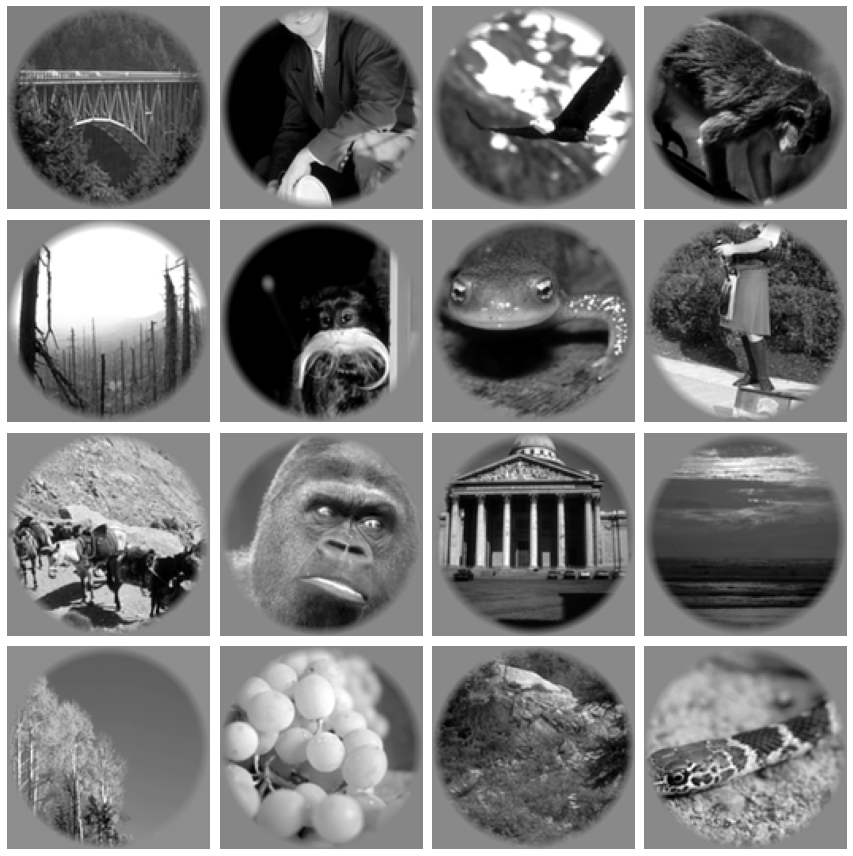

In [34]:
f, axs = plt.subplots(4, 4, figsize=(12, 12), sharex=True, sharey=True)
for ax, im, lbl in zip(axs.flat, dat["stimuli_test"], labels[-1,:]):
    ax.imshow(im, cmap="gray")
    ax.set_axis_off()

f.tight_layout()

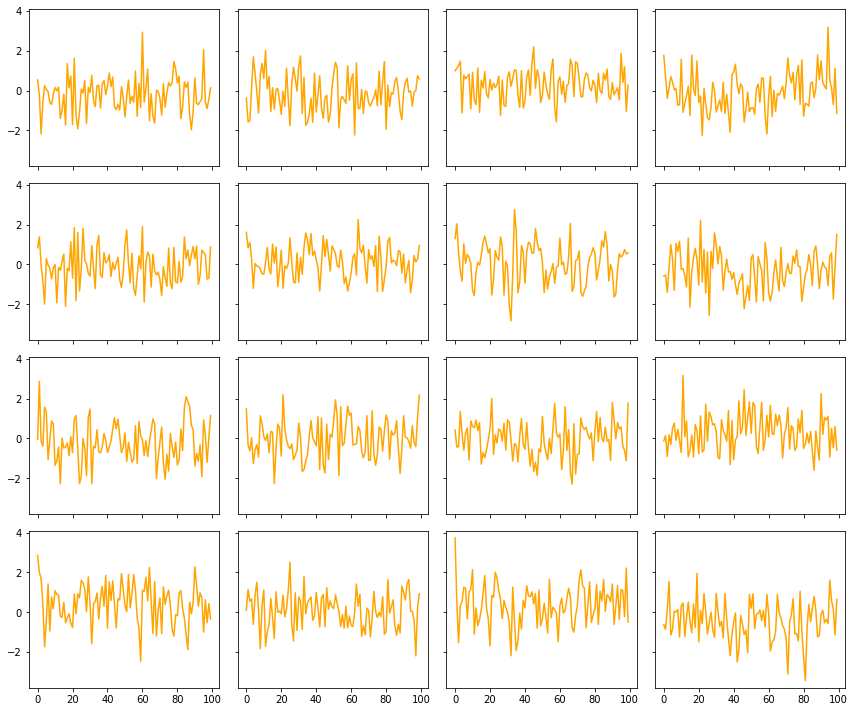

In [39]:
f, axs = plt.subplots(4, 4, figsize=(12, 10), sharex=True, sharey=True)
for ax, rsp, lbl in zip(axs.flat, dat["responses"][:, 0:100], labels[-1,:]):
    ax.plot(rsp, 'orange')

f.tight_layout()

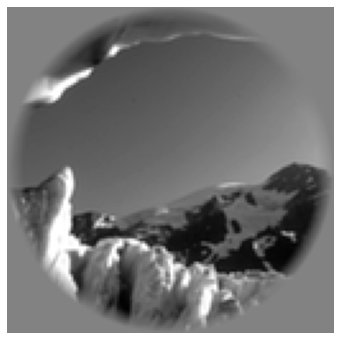

In [19]:
f, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True, sharey=True)
ax.imshow(dat["stimuli_test"][100, :], cmap="gray")
ax.set_axis_off()

Text(0, 0.5, 'response')

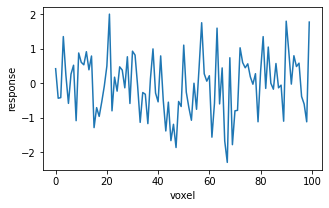

In [29]:
f, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True, sharey=True)
ax.plot(dat["responses"][10, 0:100])
ax.set_xlabel('voxel')
ax.set_ylabel('response')

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

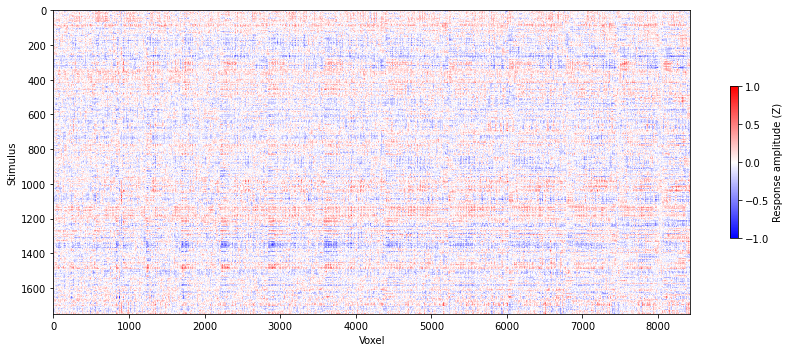

In [6]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()

The training/validation splits from the original paper are retained, so the 120 test stimuli and responses are in separate data structures:

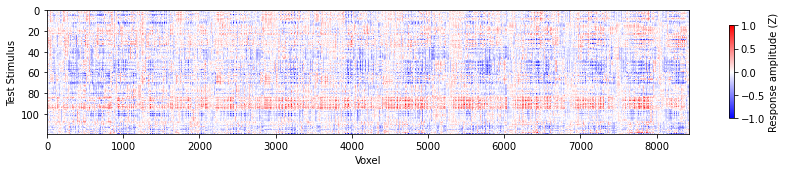

In [11]:
f, ax = plt.subplots(figsize=(12, 2.5))
ax.set(xlabel="Voxel", ylabel="Test Stimulus")
heatmap = ax.imshow(dat["responses_test"], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
f.tight_layout()